# 分類問題ー単純な機械学習アルゴリズムの訓練

『Pythonによる機械学習プログラミング』2章

https://github.com/rasbt/python-machine-learning-book-3rd-edition

## パーセプトロンの学習アルゴリズムをPythonで実装してみる

パーセプトロンの特徴は、

- m次元の入力ベクトル **x** 、重みベクトル **w** の線形和を入力として受け取り
- 決定関数、あるいは活性化関数Φを適用して、出力値を決定する
- 活性化関数は、単位ステップ関数 unit step function を採用する

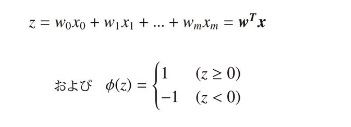

<br>

2次元の絵で表現するとこうなる。

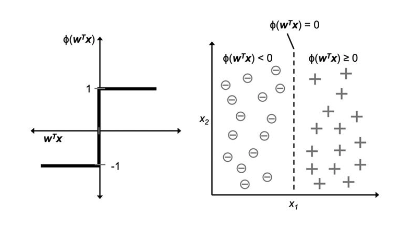

m=2として、決定境界は、

$$
    0 = w_1 * x_1 + w_2 * x_2 \\
    x_2 = -\frac{w_1}{w_2}x_1
$$

と表されるので、一次関数の線になる。線形分離可能な問題のみが対象となる。

真の意味で、まだ理解できていないのだが、i番目のデータでの学習ループにおける、j次元目の重みの更新式は以下のようになる。 

`{⊿w_j} = {学習率} * {正解値 - 予測値} * {x_j}`

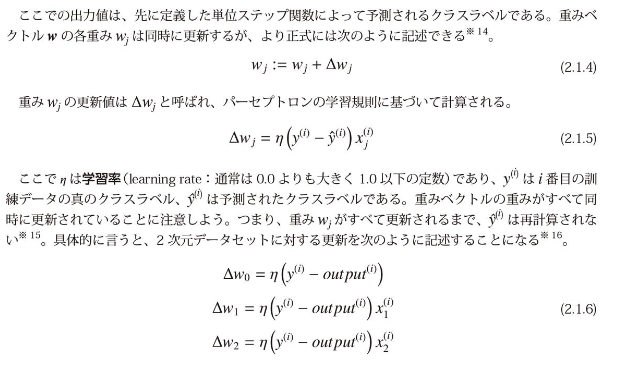

In [31]:
# 実装してみる
import numpy as np

class Perceptron(object):
    """Perceptron classifier
    
    Params
    --------------
    eta : 学習率(0.0 ~ 1.0)
    n_iter : 訓練データの訓練回数
    seed : 重み初期化のための乱数シード
    
    Attributes
    --------------
    w_ : 適合後の重み 1d-array
    errors_ : 各エポックでの誤分類の数
    """
    def __init__(self, eta: float=0.01, n_iter: int=100, seed: int=1):
        self.eta = eta
        self.n_iter = n_iter
        self.seed = seed
    
    def net_input(self, X) -> float:
        """総入力（線形和）
            X: 1d-array
        """
        # w[0] はバイアス項。X_0 は1であると考えている。
        return np.dot(X, self.w_[1:]) + self.w_[0]
    
    def predict(self, X) -> int:
        """推論
            X: 1d-array
        """
        return np.where(self.net_input(X) >= 0.0, 1, -1)
    
    def _step_function(self, z: float=None, unit: int=1) -> int:
        return 1 * unit if z >= 0.0 else 0
    
    def fit(self, X, y) -> Perceptron:
        """学習
        X : array-like
            (r, c) = (n_samples, n_features)
        y : array-like
            (r, c) = (n_samples, 1)
        """
        rand_generator = np.random.RandomState(self.seed)
        # 重みはXの列数＋1次元（バイアスの分）
        self.w_ = rand_generator.normal(loc=0.0, scale=0.01, size=1+X.shape[1])
        
        # 1データ当たりの訓練回数分訓練を繰り返す
        for _ in range(self.n_iter):
            self.errors = []
            # 全サンプルについて訓練を実施
            for x_i, y_i in zip(X, y):
                y_out = self.predict(x_i)
                # 全featureについて重み更新
                delta_w_i_0 = self.eta * (y_i - y_out)
                delta_w_i_ = self.eta * (y_i - y_out) * x_i
                self.w_[0] += delta_w_i_0
                self.w_[1:] = self.w_[1:] + delta_w_i_
                # append error flg
                self.errors.append(1 if int(y_i - y_out) != 0 else 0)
            # 当該エポックに関するエラーの数をチェック
            err_bar = ['■'] * sum(self.errors)
            print(''.join(err_bar))
        return self

In [35]:
import random
X = np.array(np.random.randn(3000)).reshape(1000, 3)
y = random.choices([1, 0], k=10)

In [38]:
model = Perceptron()
model.fit(X, y)

■■■■■■
■■■■■■■■■
■■■■■■
■■■■■■■■■
■■■■■■
■■■■■■
■■■■■■■■■
■■■■■■■
■■■■■■■
■■■■■■■
■■■■■■
■■■■■■■■
■■■■■■
■■■■■■■■■
■■■■■■
■■■■■■■■
■■■■■■■
■■■■■■■
■■■■■■■■
■■■■■■■
■■■■■■■
■■■■■■■
■■■■■■■
■■■■■■■■
■■■■■■■
■■■■■■■
■■■■■■■■
■■■■■■
■■■■■■■■
■■■■■■■
■■■■■■■
■■■■■■■
■■■■■■■■■
■■■■■■■
■■■■■■
■■■■■■■
■■■■■■■
■■■■■■
■■■■■■■
■■■■■■■■
■■■■■■
■■■■■■■
■■■■■■■■■
■■■■■■
■■■■■■■■
■■■■■■■
■■■■■■■■
■■■■■■
■■■■■■■■■
■■■■■■
■■■■■■■■
■■■■■■■
■■■■■■■
■■■■■■■■
■■■■■■■
■■■■■■■
■■■■■■■
■■■■■■■
■■■■■■■■
■■■■■■■■
■■■■■■
■■■■■■■
■■■■■■■
■■■■■■
■■■■■■■■■
■■■■■■
■■■■■■■■■
■■■■■■
■■■■■■■■
■■■■■■
■■■■■■
■■■■■■■
■■■■■■
■■■■■■■
■■■■■■■
■■■■■■■■
■■■■■■■
■■■■■■■
■■■■■■■
■■■■■■■■■
■■■■■■
■■■■■■■■
■■■■■■■
■■■■■■■
■■■■■■
■■■■■■■
■■■■■■■
■■■■■■■
■■■■■■■■
■■■■■■
■■■■■■■
■■■■■■■■■
■■■■■■
■■■■■■■■
■■■■■■■
■■■■■■■
■■■■■■■■
■■■■■■■
■■■■■■■
■■■■■■■■■
